In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://51.91.120.89/pad1411/veturilo.csv", usecols=["ts","qnty"], parse_dates=True, index_col="ts").sort_index()
df.head()

,qnty
ts,
2020-07-10 18:55:00,2
2020-07-10 19:00:00,2
2020-07-10 19:05:00,2
2020-07-10 19:10:00,2
2020-07-10 19:15:00,12


In [3]:
df.index

DatetimeIndex(['2020-07-10 18:55:00', '2020-07-10 19:00:00',
               '2020-07-10 19:05:00', '2020-07-10 19:10:00',
               '2020-07-10 19:15:00', '2020-07-10 19:20:00',
               '2020-07-10 19:25:00', '2020-07-10 19:30:00',
               '2020-07-10 19:35:00', '2020-07-10 19:40:00',
               ...
               '2020-07-31 10:10:00', '2020-07-31 10:15:00',
               '2020-07-31 10:20:00', '2020-07-31 10:25:00',
               '2020-07-31 10:30:00', '2020-07-31 10:35:00',
               '2020-07-31 10:40:00', '2020-07-31 10:45:00',
               '2020-07-31 10:50:00', '2020-07-31 10:55:00'],
              dtype='datetime64[ns]', name='ts', length=5948, freq=None)

In [4]:
df.dtypes

qnty    object
dtype: object

In [5]:
df.qnty.unique()

array(['2', '12', '7', '9', '8', '6', '5', '4', '1', '10', '11', '0', '3',
       '16', '17', '14', '15', '13', '18', '19', '?'], dtype=object)

In [6]:
df[df.qnty=="?"]

,qnty
ts,
2020-07-17 23:35:00,?
2020-07-17 23:40:00,?
2020-07-17 23:45:00,?
2020-07-17 23:50:00,?
2020-07-17 23:55:00,?
2020-07-18 00:00:00,?
2020-07-29 08:25:00,?
2020-07-29 08:30:00,?
2020-07-29 08:35:00,?


In [9]:
# zastąp znaki ? wartościami NaN, a następnie NaN zamień na ostatnio widziane wartości numeryczne
df.qnty = df.qnty.replace("?", np.NaN).fillna(method="ffill").astype("uint8")
df.qnty.unique()

array([ 2, 12,  7,  9,  8,  6,  5,  4,  1, 10, 11,  0,  3, 16, 17, 14, 15,
       13, 18, 19], dtype=uint8)

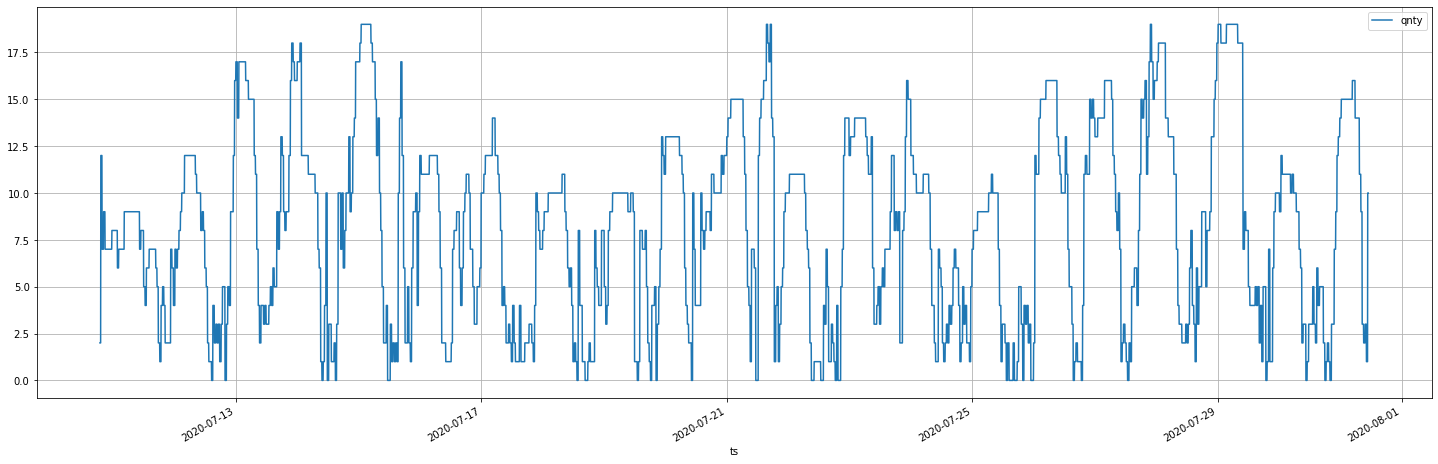

In [11]:
df.plot(grid=True, figsize=(25,8) )

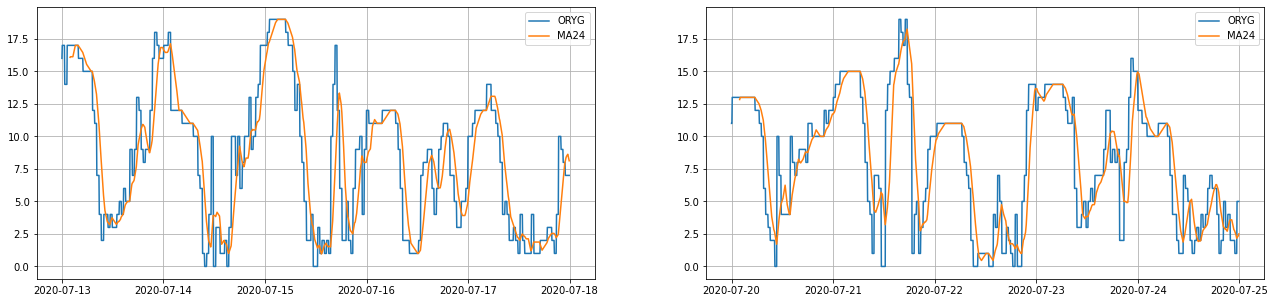

In [15]:
plt.subplots(1, 2, figsize=(22,5))

df13_17 = df.loc["2020-07-13":"2020-07-17"]
plt.subplot(1,2, 1)
plt.plot(df13_17.index, df13_17.qnty)
plt.plot(df13_17.index, df13_17.qnty.rolling(24).mean())
plt.grid()
plt.legend(['ORYG','MA24'])

df20_24 = df.loc["2020-07-20":"2020-07-24"]
plt.subplot(1,2, 2)
plt.plot(df20_24.index, df20_24.qnty)
plt.plot(df20_24.index, df20_24.qnty.rolling(24).mean())
plt.grid()
plt.legend(['ORYG','MA24'])

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

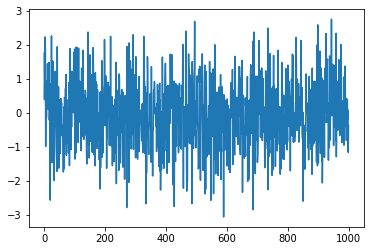

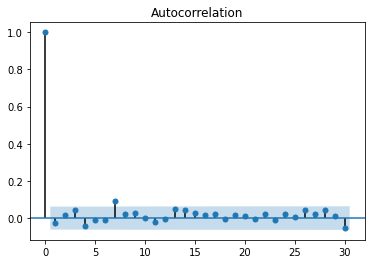

2.044378661289986


In [21]:
np.random.seed(0)
y = np.random.normal(0, 1, 1000)

plt.plot(y)
plt.show()

plot_acf(y)
plt.show()

print(durbin_watson(y))

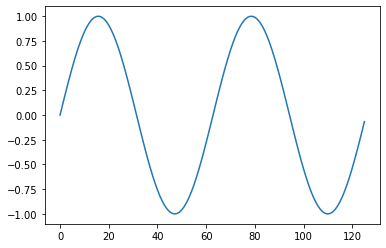

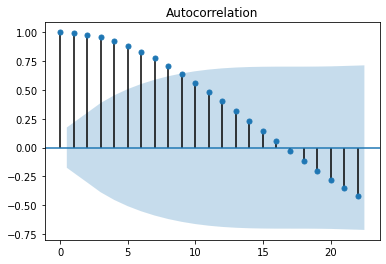

0.009886173184214862


In [22]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)

plt.plot(y)
plt.show()

plot_acf(y)
plt.show()

print(durbin_watson(y))

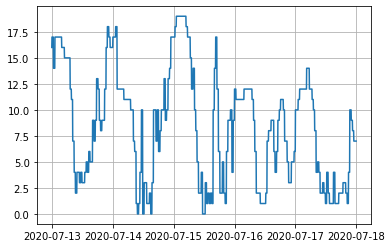

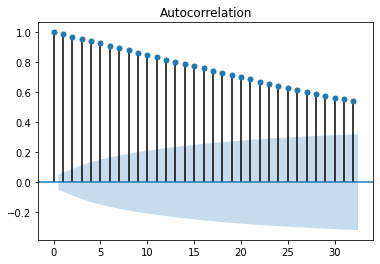

0.01273107592987821


In [23]:
df13_17 = df.loc["2020-07-13":"2020-07-17"]
plt.plot(df13_17.index, df13_17.qnty)
plt.grid()

plot_acf(df13_17.qnty)
plt.show()

print(durbin_watson(df13_17.qnty))

In [ ]:
!pip install fbprophet

In [25]:
from fbprophet import Prophet

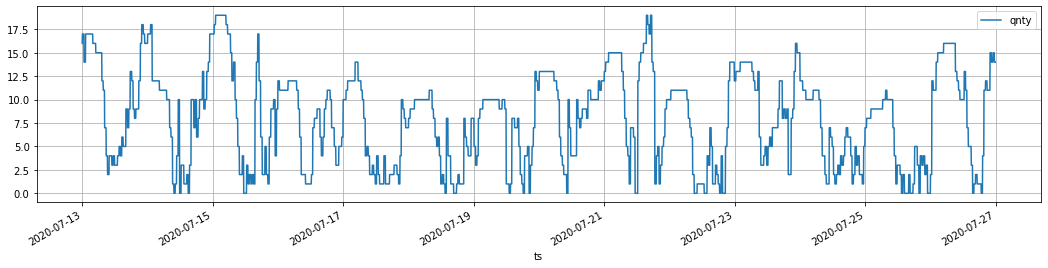

In [26]:
df_predict = df.loc["2020-07-13":"2020-07-26"]
df_predict.plot(figsize=(18,4), grid=True)

In [28]:
df_predict.reset_index(inplace=True)
df_predict.columns = ['ds','y']
df_predict.head()

,ds,y
0,2020-07-13 00:00:00,16
1,2020-07-13 00:05:00,17
2,2020-07-13 00:10:00,17
3,2020-07-13 00:15:00,17
4,2020-07-13 00:20:00,17


In [29]:
model = Prophet()
model.fit(df_predict)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [31]:
future = model.make_future_dataframe(periods=48, freq="H")

In [32]:
forecast = model.predict(future)

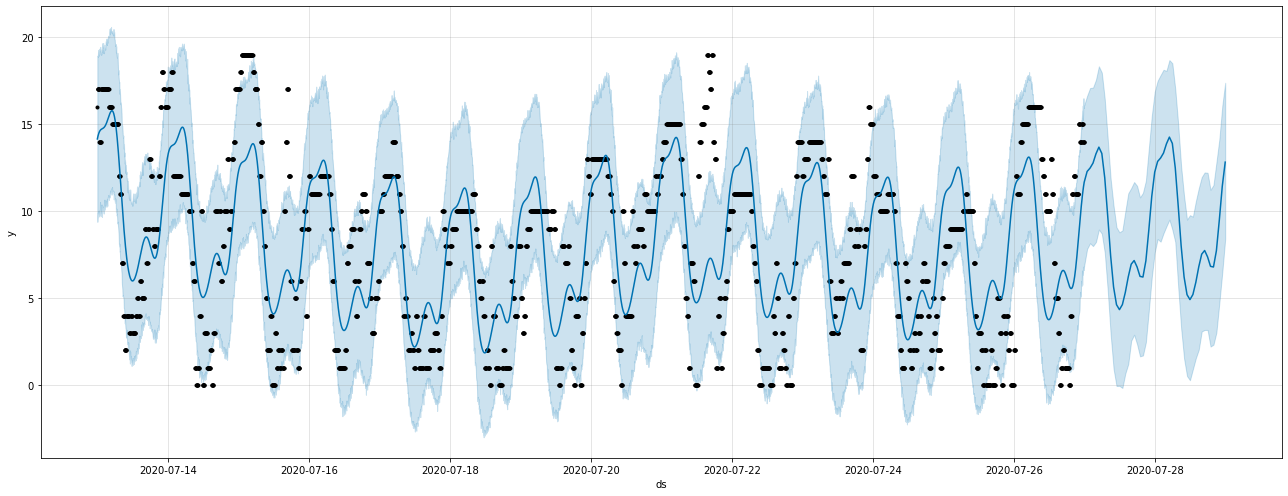

In [35]:
model.plot(forecast, figsize=(18,7))
plt.show()

In [36]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

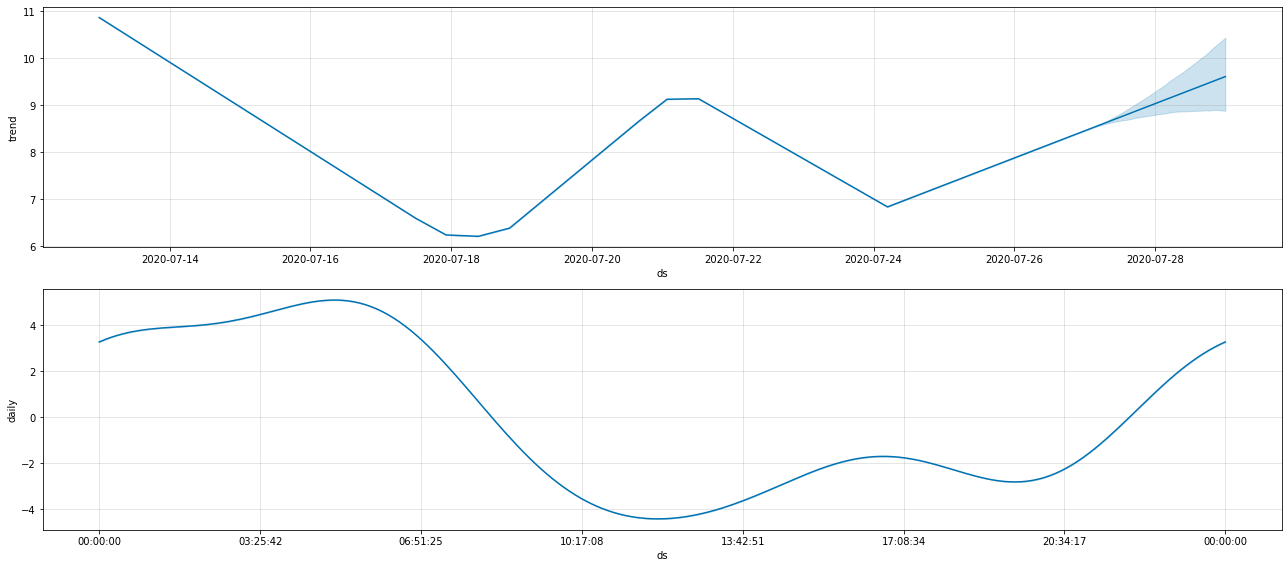

In [37]:
model.plot_components(forecast, figsize=(18,8))
plt.show()

In [38]:
df_2707 = df.loc["2020-07-27":"2020-07-28"]
df_2707

,qnty
ts,
2020-07-27 00:00:00,14
2020-07-27 00:05:00,13
2020-07-27 00:10:00,13
2020-07-27 00:15:00,13
2020-07-27 00:20:00,13
...,...
2020-07-28 23:35:00,16
2020-07-28 23:40:00,16
2020-07-28 23:45:00,18


In [ ]:
df_tmp = forecast[ ["ds","yhat","yhat_lower","yhat_upper"] ].set_index('ds').loc["2020-07-27":"2020-07-28"]
df_tmp

In [45]:
df_res = pd.concat([df_2707, df_tmp], axis=1)
df_res.loc[ ["2020-07-27 20:55:00"] ]

,qnty,yhat,yhat_lower,yhat_upper
2020-07-27 20:55:00,13,7.14648,2.462719,11.751535


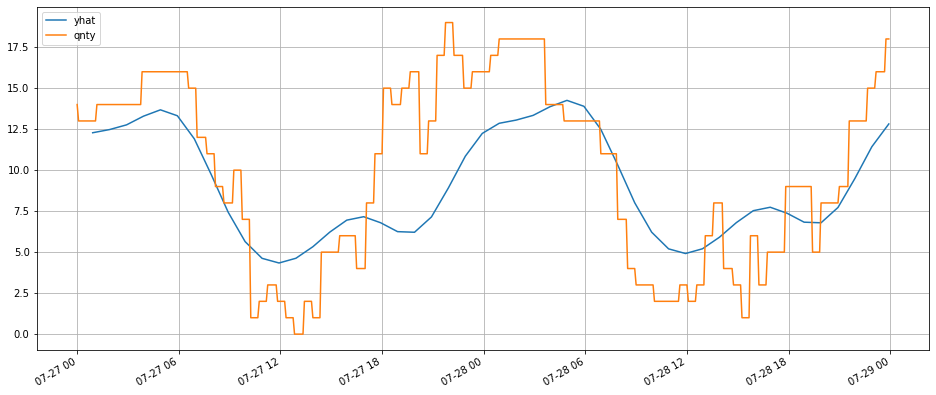

In [51]:
df_res.yhat[ ~df_res.yhat.isna() ].plot()
df_res.qnty.plot(figsize=(16,7), grid=True)
plt.legend()
plt.show()